# SC2001 Project 3 - Dynamic Programming

We have a knapsack of capacity weight C (a positive integer) and n types of objects. Each object of the ith type has weight wi and profit pi (all wi and all pi are positive integers, i = 0, 1, …, n-1). There are unlimited supplies of each type of objects. Find the largest total profit of any set of the objects that fits in the knapsack.
Let P(C) be the maximum profit that can be made by packing objects into the knapsack of capacity C.

(1) Give a recursive definition of the function P(C).

P(C, i) = max(P(C, i-1), P(C-wi,i-1) + pi)

P(C) = max(P(C), P(C-wi) + pi)

where P(C) = 0 when C = 0; n = 0 ;

(2) Draw the subproblem graph for P(14) where n is 3 with the weights and profits given below.

w = [4,6,8]

p = [7,6,9]

In [ ]:
P(14)   -> P(10)
        -> P(8)
        -> P(6)  
  
P(10)   -> P(6)
        -> P(4)
        -> P(2)

P(8)    -> P(4)
        -> P(0)

P(6)    -> P()


(3) Give a dynamic programming algorithm to compute the maximum profit, given a knapsack of capacity C, n types of objects with weights wi and profits pi using the bottom up approach.

In [40]:
def bottom_up_knapsack(W, P, C, n): 
    # Time Complexity: O(1)
    W.insert(0,0)
    P.insert(0,0)

    # Time Complexity: O(n^2)
    result = []
    for i in range(n+1):
        temp_arr = []   
        for j in range(C+1): 
            temp_arr.append(0)
        result.append(temp_arr)

    # Time Complexity: O(nC) recursive calls
    for i in range(1, n+1):
        for j in range(1, C+1):
            if(j-W[i]>=0):
                result[i][j] = max(result[i-1][j], P[i] + result[i-1][j-W[i]]) # O(1)
            else: 
                result[i][j] = result[i-1][j] # O(1)
        
    return result[n][C]

In [41]:
w = [4,6,8,6]
p = [7,6,9,5]
C = 20
n = 4

bottom_up_knapsack(w,p,C,n)

[0, 4, 6, 8, 6]


22

(4) Code your algorithm in a programming language
- show the running result of P(14) with weights and profits given in (2).
- Show the running result of P(14) with weights and profits given below.

In [69]:
import matplotlib.pyplot as plt

def visual_bottom_up_knapsack(W, P, C, n): 
    # Time Complexity: O(1)
    W.insert(0,0)
    P.insert(0,0)

    # Time Complexity: O(n^2)
    result = []
    for i in range(n+1):
        temp_arr = []   
        for j in range(C+1): 
            temp_arr.append(0)
        result.append(temp_arr)


    # Time Complexity: O(nC) recursive calls
    for i in range(1, n+1):
        for j in range(1, C+1):
            if(j-W[i]>=0):
                result[i][j] = max(result[i-1][j], P[i] + result[i-1][j-W[i]]) # O(1)
            else: 
                result[i][j] = result[i-1][j] # O(1)
                
            # Visualize the running result as a matrix
            plt.clf()
            plt.imshow(result, cmap='cool', interpolation='nearest')
            for x in range(len(result)):
                for y in range(len(result[0])):
                    plt.text(y, x, result[x][y], ha='center', va='center')
                    # Add numerical annotation to each cell of the plot
            plt.title(f"Running result of visual_bottom_up_knapsack for i={i} and j={j}")
            plt.colorbar()
            plt.pause(0.001)
        
    return result[n][C]

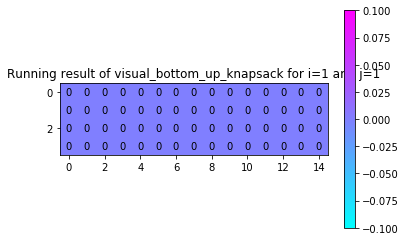

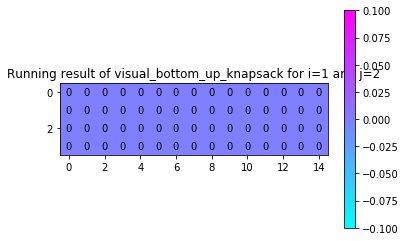

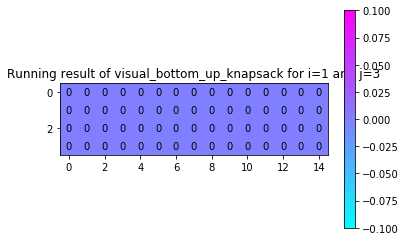

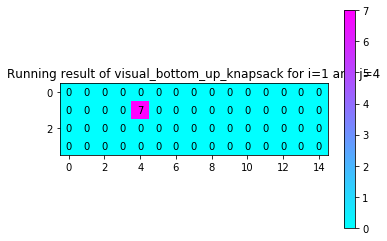

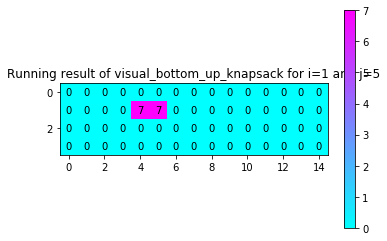

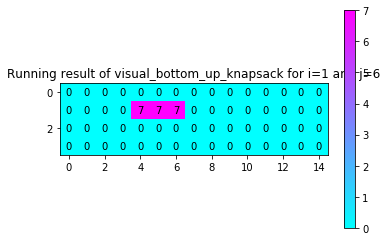

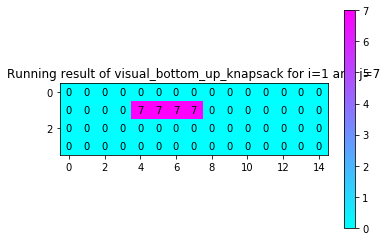

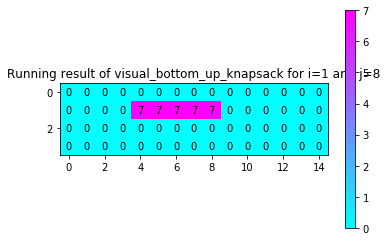

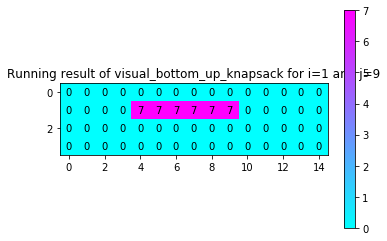

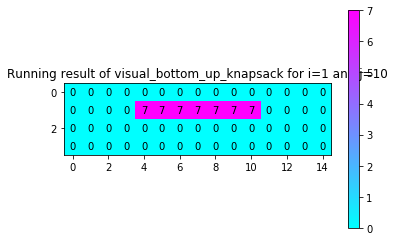

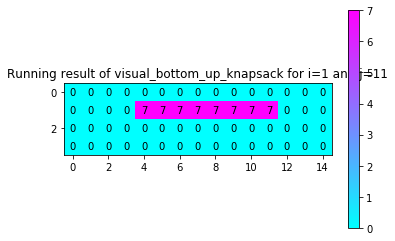

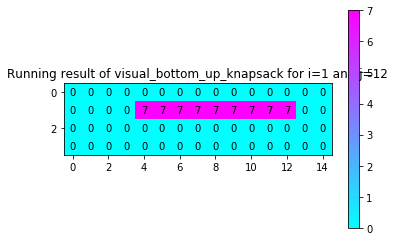

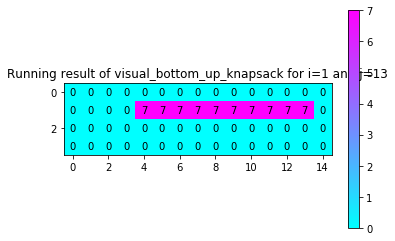

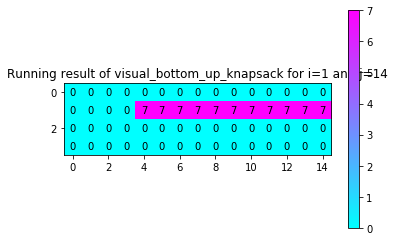

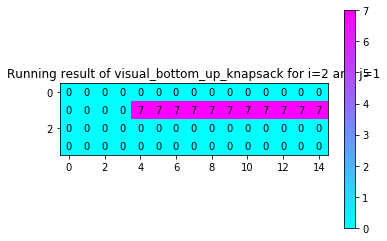

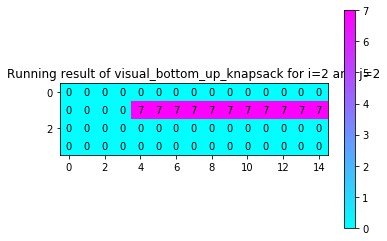

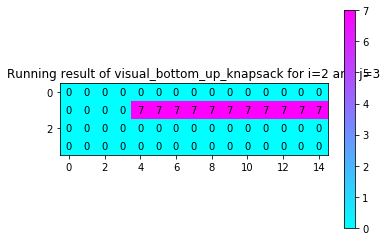

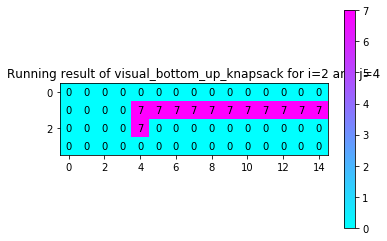

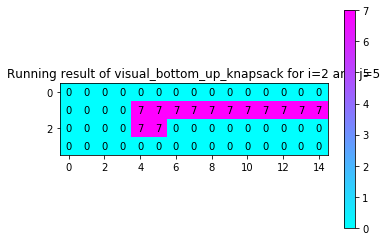

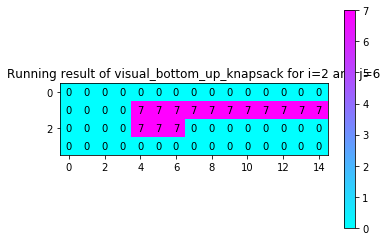

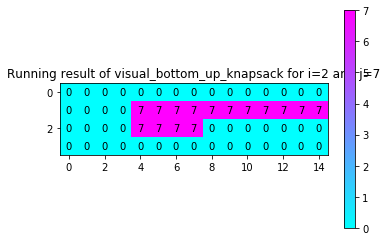

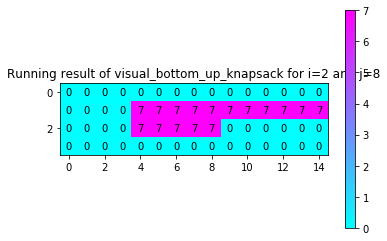

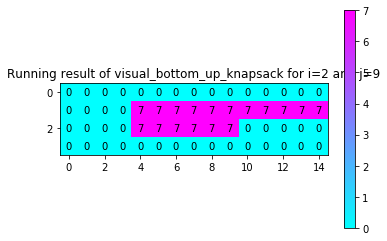

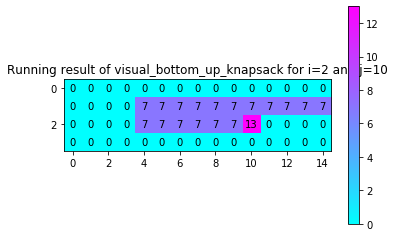

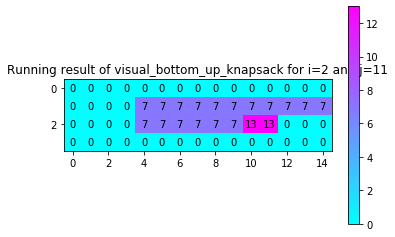

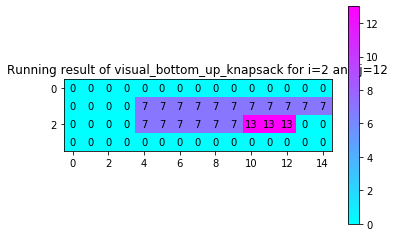

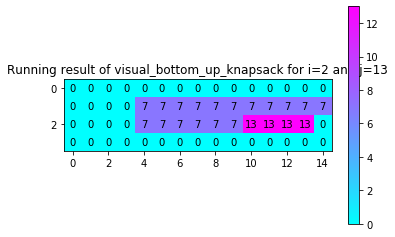

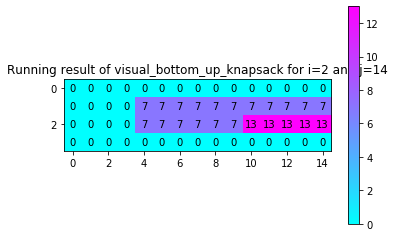

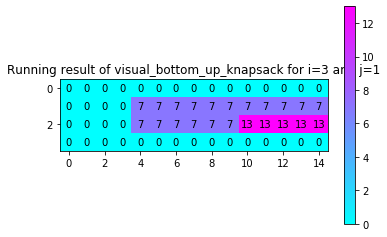

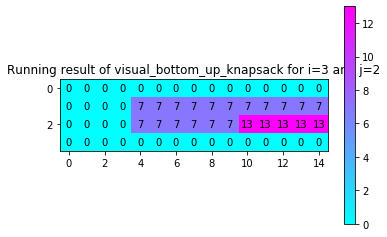

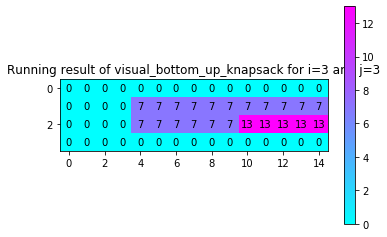

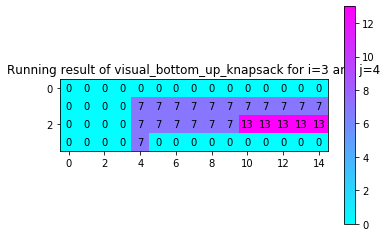

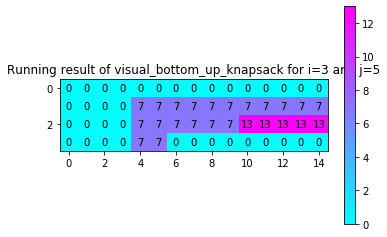

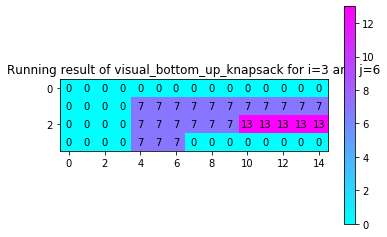

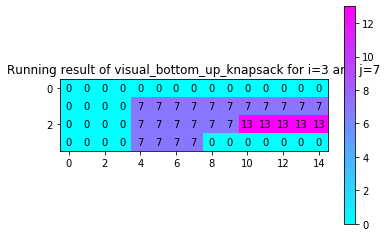

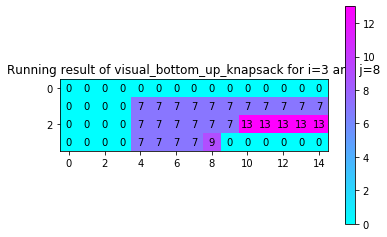

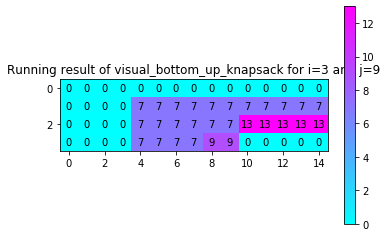

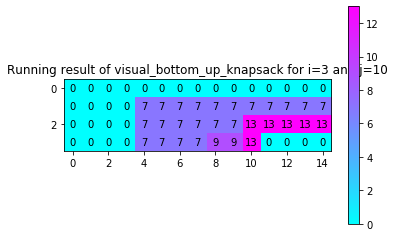

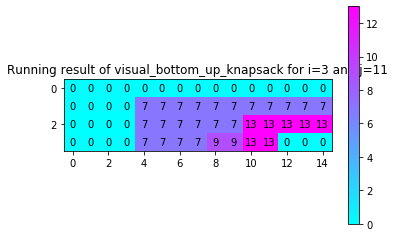

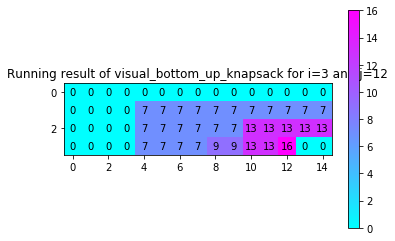

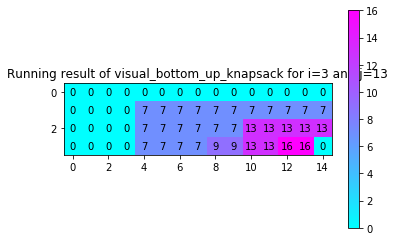

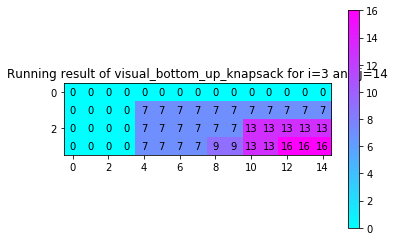

16

In [70]:
w = [4,6,8]
p = [7,6,9]
C = 14  
n = 3

visual_bottom_up_knapsack(w,p,C,n)

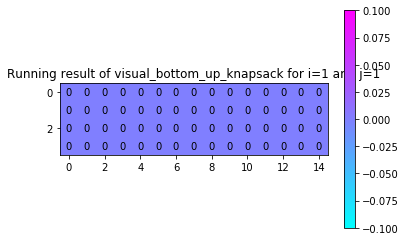

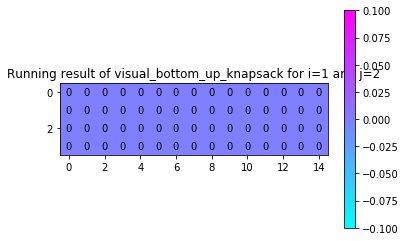

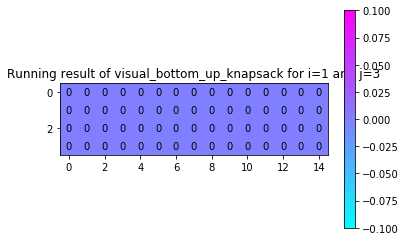

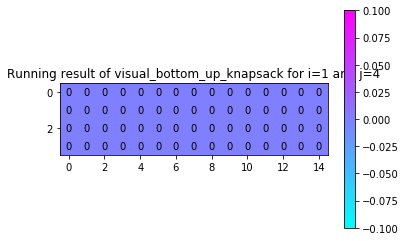

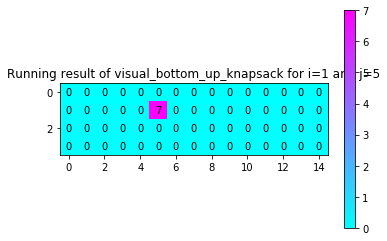

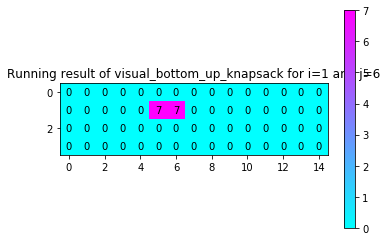

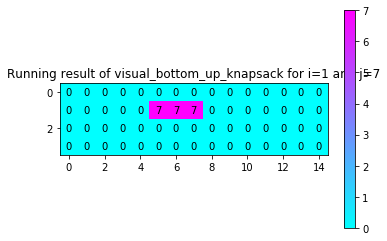

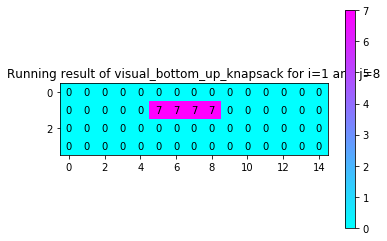

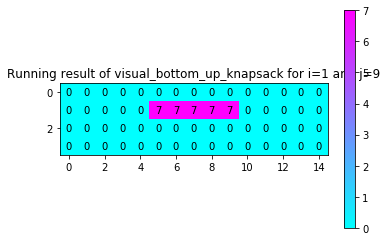

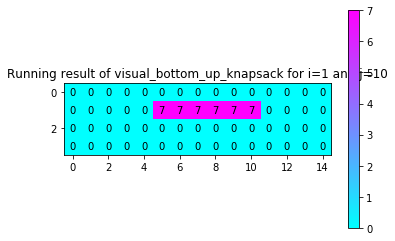

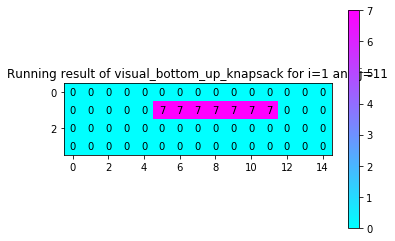

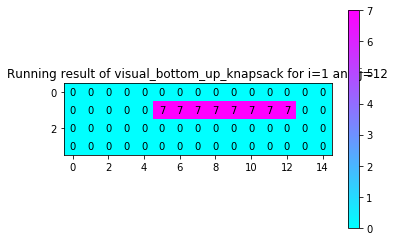

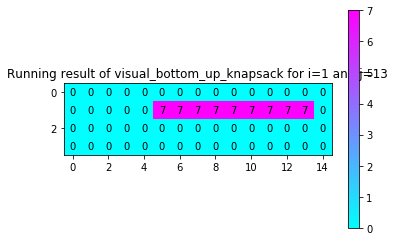

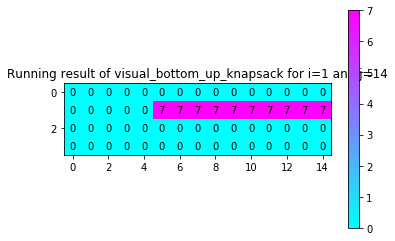

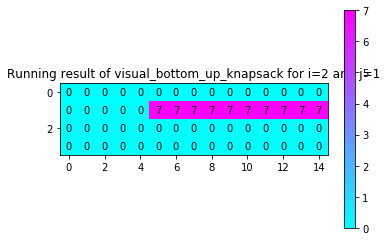

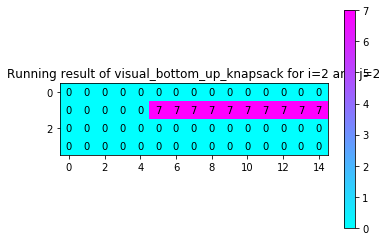

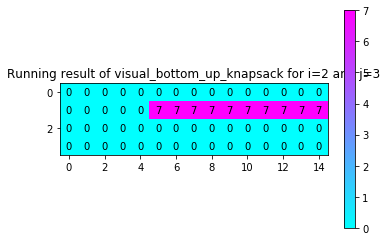

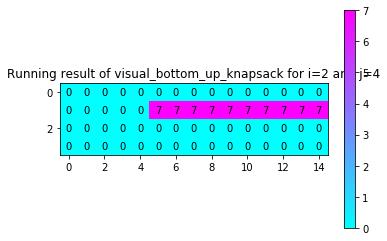

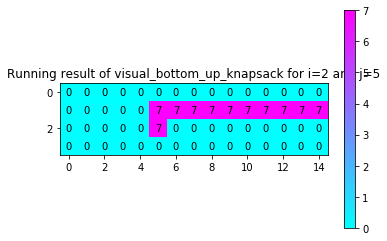

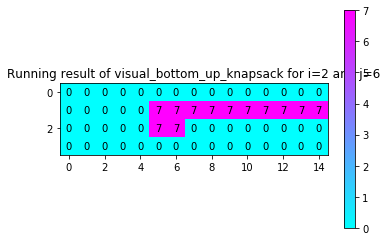

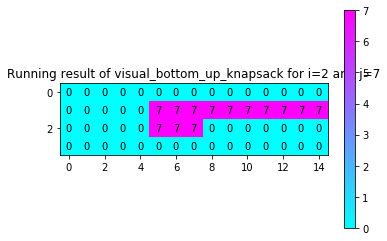

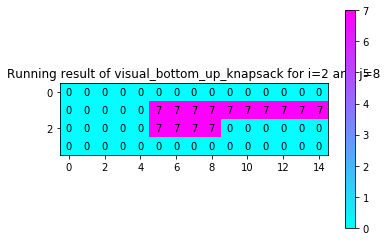

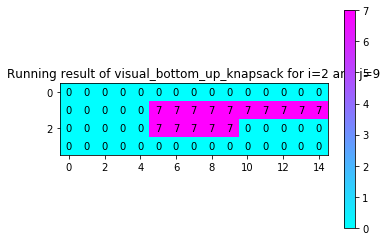

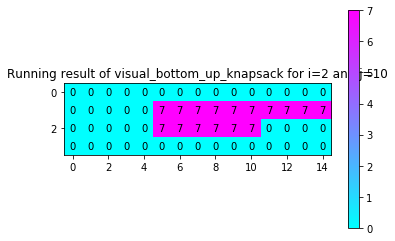

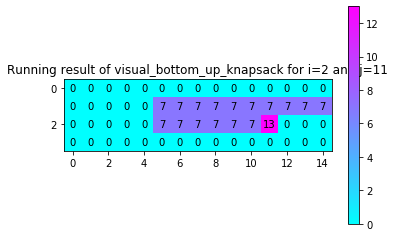

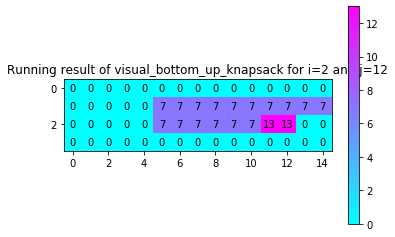

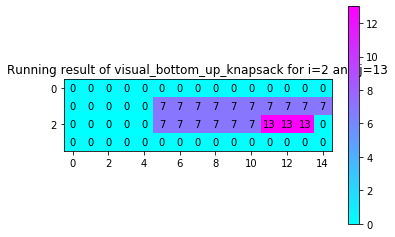

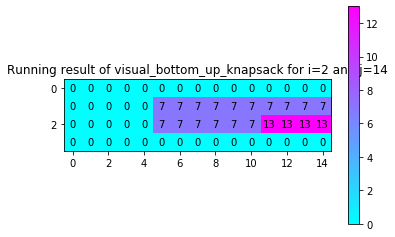

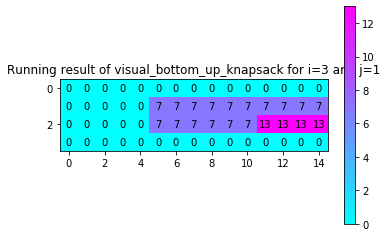

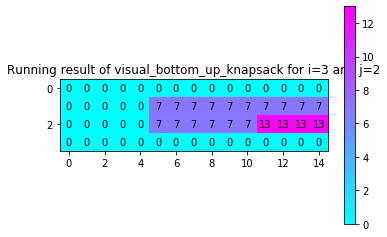

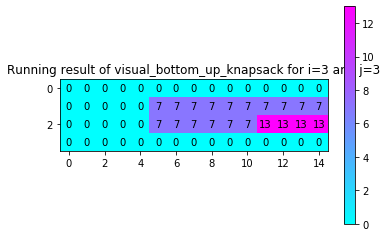

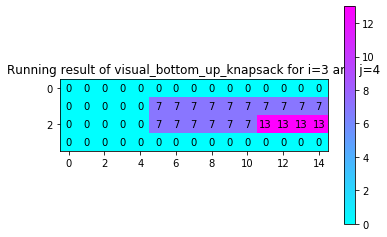

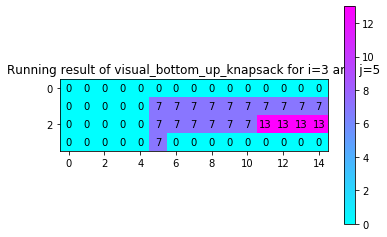

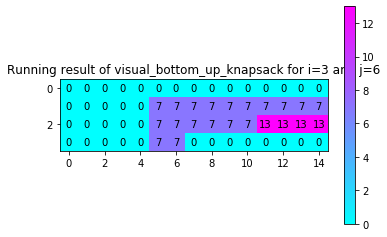

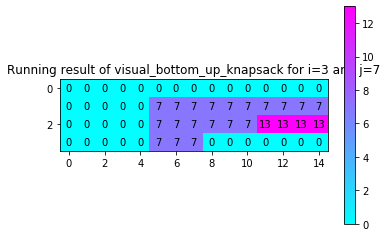

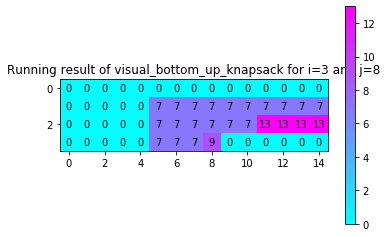

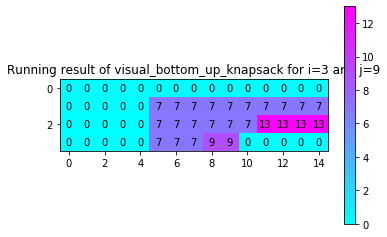

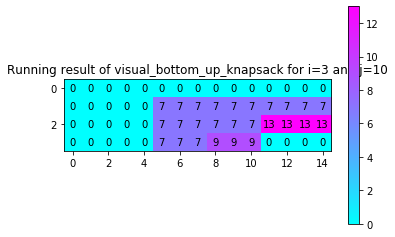

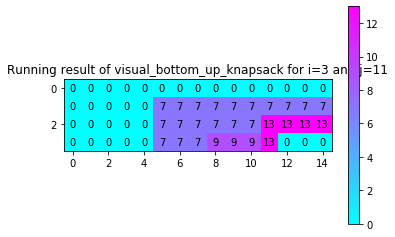

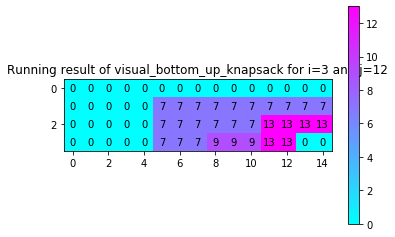

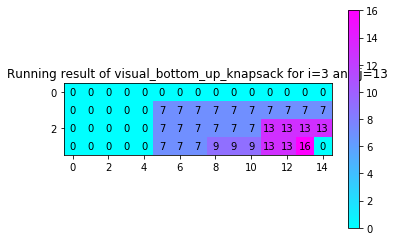

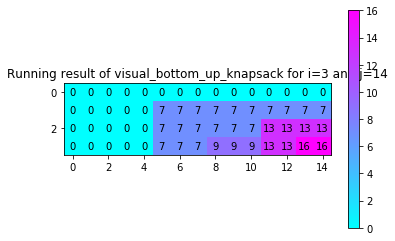

16

In [71]:
w = [5,6,8]
p = [7,6,9]
C = 14  
n = 3

visual_bottom_up_knapsack(w,p,C,n)

**Conclusion**: We can see that when changing the smallest weight item from 4 to 5, the maximum profit starts calculating from Weight 5 onwards, 